In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

import warnings
warnings.filterwarnings('ignore')

In [3]:
header_list=["age","work_class","final_weight","education","education_num","marital_status","occupation","relationship","race","gender","capital_gained","capital_loss","hours","country","income"]

In [4]:
df= pd.read_csv('adult.data.csv', names= header_list)
df1= pd.read_csv('adult.test.csv', names= header_list)

In [5]:
df=df.append(df1, ignore_index= True)

In [6]:
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gained,capital_loss,hours,country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [7]:
df.shape

(48843, 15)

In [8]:
df.dtypes

age                object
work_class         object
final_weight      float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gained    float64
capital_loss      float64
hours             float64
country            object
income             object
dtype: object

In [9]:
i= df[df['age']=='|1x3 Cross validator'].index
df=df.drop(i)

In [10]:
df['age']=df['age'].astype(int)

In [11]:
df.nunique()

age                  74
work_class            9
final_weight      28523
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
gender                2
capital_gained      123
capital_loss         99
hours                96
country              42
income                4
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
final_weight,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education_num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital_gained,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital_loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [13]:
df['work_class'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: work_class, dtype: int64

In [14]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
df['country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Nicaragua                        49
 Greece                           49
 

In [16]:
#replacing the '?' values with mode
df['work_class'] = df['work_class'].str.replace('?', 'Private')
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty')
df['country'] = df['country'].str.replace('?', 'United-States')

In [17]:
# income
df.income = df.income.str.replace('<=50K', '0')
df.income = df.income.str.replace('>50K', '1')
df.income = df.income.str.replace('<=50K.', '0')
df.income = df.income.str.replace('>50K.', '1')

In [18]:
df['income'].value_counts()

 0     24720
 0.    12435
 1      7841
 1.     3846
Name: income, dtype: int64

In [19]:
df['income'] = df['income'].str.replace('.', "")

In [20]:
df['income'].value_counts()

 0    37155
 1    11687
Name: income, dtype: int64

In [21]:
df['income']=df['income'].astype(int)

<AxesSubplot:xlabel='income', ylabel='count'>

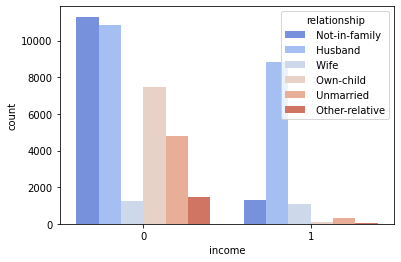

In [22]:
sns.countplot(df['income'], palette='coolwarm', hue='relationship', data=df)

In [23]:
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gained,capital_loss,hours,country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [24]:
df.corr()

,age,final_weight,education_num,capital_gained,capital_loss,hours,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
final_weight,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital_gained,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<AxesSubplot:>

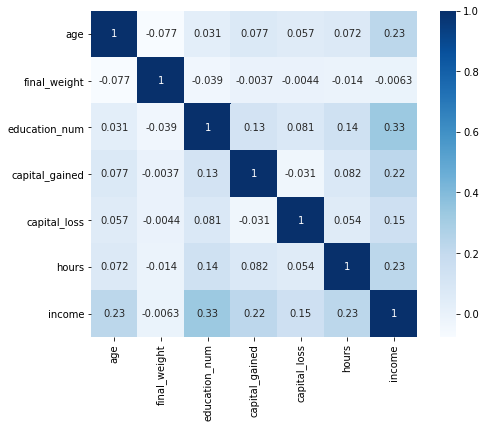

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True,square= True,cmap= 'Blues')

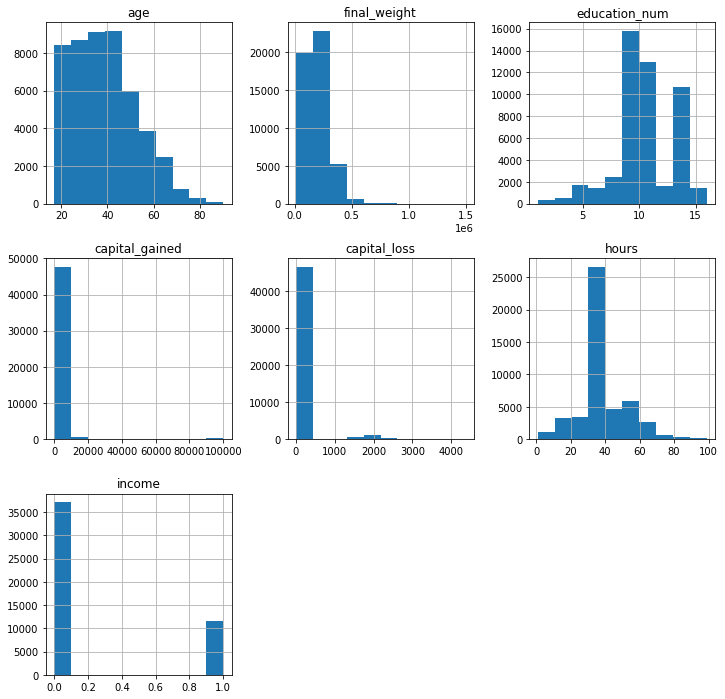

In [26]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

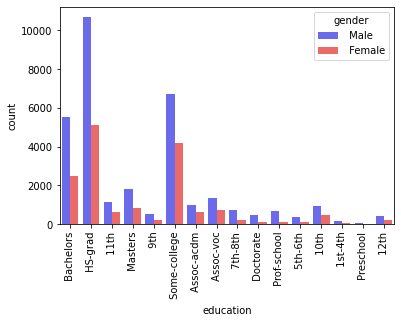

In [27]:
sns.countplot(df['education'], hue='gender', data=df, palette='seismic')
plt.xticks(rotation=90);

In [28]:
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gained,capital_loss,hours,country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


<AxesSubplot:xlabel='gender', ylabel='age'>

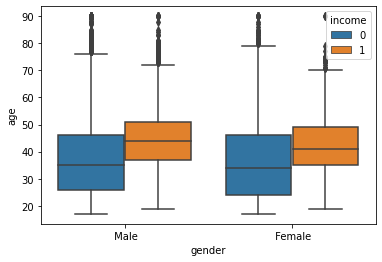

In [29]:
sns.boxplot(y='age',x='gender',hue='income',data=df)

In [30]:
onehot_gender= pd.get_dummies(df['gender'])

In [31]:
df=pd.concat([df,onehot_gender],axis=1)

In [32]:
df.drop(columns=['gender'],axis=1,inplace= True)

In [33]:
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gained,capital_loss,hours,country,income,Female,Male
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,2174.0,0.0,40.0,United-States,0,0,1
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,13.0,United-States,0,0,1
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,40.0,United-States,0,0,1
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,40.0,United-States,0,0,1
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,40.0,Cuba,0,1,0


In [34]:
onehot_relationship=pd.get_dummies(df['relationship'])

In [35]:
df=pd.concat([df,onehot_relationship],axis=1)

In [36]:
x=df.drop(['work_class','education','final_weight','marital_status','occupation','relationship','race','country'],axis=1)

In [37]:
y=df['income']

In [46]:
x

,age,education_num,capital_gained,capital_loss,hours,income,Female,Male,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,13.0,2174.0,0.0,40.0,0,0,1,0,1,0,0,0,0
1,50,13.0,0.0,0.0,13.0,0,0,1,1,0,0,0,0,0
2,38,9.0,0.0,0.0,40.0,0,0,1,0,1,0,0,0,0
3,53,7.0,0.0,0.0,40.0,0,0,1,1,0,0,0,0,0
4,28,13.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,13.0,0.0,0.0,36.0,0,1,0,0,1,0,0,0,0
48839,64,9.0,0.0,0.0,40.0,0,0,1,0,0,1,0,0,0
48840,38,13.0,0.0,0.0,50.0,0,0,1,1,0,0,0,0,0
48841,44,13.0,5455.0,0.0,40.0,0,0,1,0,0,0,1,0,0


In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48838    0
48839    0
48840    0
48841    0
48842    1
Name: income, Length: 48842, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
# importing classifiers module
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf= SVC()
clf.fit(x_train,y_train)
y_pred_svc= clf.predict(x_test)
acc_svc= round(clf.score(x_train,y_train)*100,2)
print(acc_svc)

80.13


In [49]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train,y_train)
y_pred_knn= clf.predict(x_test)
acc_knn= round(clf.score(x_train,y_train)*100,2)
print(acc_knn)

97.82


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import classification_report

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=5)

classifier = DecisionTreeClassifier(max_depth=10, random_state=3) 
# training the classifier
classifier.fit(x_train, y_train)
# do our predictions on the test
train_pred = classifier.predict(x_train)
predictions = classifier.predict(x_test)
# see how good we did on the test
print('Training Accuracy : {}%'.format(accuracy_score(y_true = y_train, y_pred = train_pred)*100))
print('Testing Accuracy : {}%'.format(accuracy_score(y_true = y_test, y_pred = predictions)*100))
target_names = ['0','1']
print('++++++++++++++++++++++++++++++ \n Classification Report:')
print(classification_report(y_true = y_test, y_pred = predictions, target_names=target_names))
print('++++++++++++++++++++++++++++++ \n Confusion Matrix:')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))


Training Accuracy : 100.0%
Testing Accuracy : 100.0%
++++++++++++++++++++++++++++++ 
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7440
           1       1.00      1.00      1.00      2329

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769

++++++++++++++++++++++++++++++ 
 Confusion Matrix:
Predicted      0     1    All
True                         
0          29715     0  29715
1              0  9358   9358
All        29715  9358  39073
